In [ ]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt
import importlib
import im3
importlib.reload(im3)

# import analysis/psd.py and analysis/im3.py
repo_root = os.path.abspath(os.getcwd())
analysis_dir = os.path.join(repo_root, "analysis")
if analysis_dir not in sys.path:
    sys.path.insert(0, analysis_dir)

from psd import psd_db
from im3 import im3_metrics


In [ ]:
# RF settings for plot
fc = 915e6
fs = 2.4e6

# Choose offsets (Hz)
f_off1 = -250e3
f_off2 = +250e3

# IM3 offsets: 2*f1 - f2 and 2*f2 - f1 (in baseband)
f_im3_off_low  = 2*f_off1 - f_off2   # -750 kHz
f_im3_off_high = 2*f_off2 - f_off1   # +750 kHz

# Generate signal
N = 262144
t = np.arange(N) / fs

amp_fund = 1.0
amp_im3  = 0.03   # small IM3 term
noise_amp = 0.01

x = (
    (amp_fund/2) * np.exp(1j*2*np.pi*f_off1*t)
  + (amp_fund/2) * np.exp(1j*2*np.pi*f_off2*t)
  + (amp_im3/2)  * np.exp(1j*2*np.pi*f_im3_off_low*t)
  + (amp_im3/2)  * np.exp(1j*2*np.pi*f_im3_off_high*t)
  + noise_amp * (np.random.randn(N) + 1j*np.random.randn(N))
)


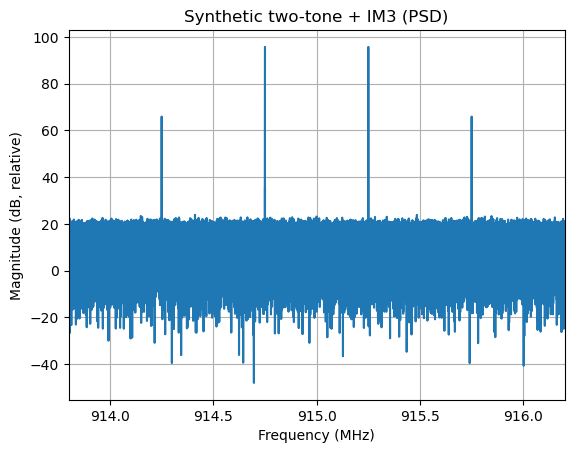

In [11]:
f, p_db = psd_db(x, fs=fs, fc=fc, nfft=N)

plt.figure()
plt.plot(f/1e6, p_db)
plt.xlim((fc-1.2e6)/1e6, (fc+1.2e6)/1e6)
plt.xlabel("Frequency (MHz)")
plt.ylabel("Magnitude (dB, relative)")
plt.title("Synthetic two-tone + IM3 (PSD)")
plt.grid(True)
plt.show()


In [12]:
# Absolute tone frequencies (Hz)
f1 = fc + f_off1
f2 = fc + f_off2

metrics = im3_metrics(f, p_db, f1=f1, f2=f2)
metrics


{'p1_db': np.float64(95.70266359425688),
 'p2_db': np.float64(95.70176907667006),
 'pim3l_db': np.float64(65.88971072276274),
 'pim3h_db': np.float64(65.87814874485039),
 'pfund_db': np.float64(95.70221633546348),
 'pim3_db': np.float64(65.88392973380657),
 'delta_db': np.float64(29.818286601656908),
 'oip3_rel_db': np.float64(110.61135963629192),
 'fim3_low': 914250000.0,
 'fim3_high': 915750000.0}